## Analysis of HA genes of influenza A viruses in tropical region during 2019-2022

In [ ]:
!pip install biopython
!pip install scikit-bio

from google.colab import output
output.clear()

In [ ]:
import Bio
import skbio
import scipy
from Bio import Phylo, AlignIO, SeqIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

In [ ]:
#Ref: https://lanadominkovic.medium.com/bioinformatics-101-reading-fasta-files-using-biopython-501c390c6820
fasta_path = "/content/clustalw - Copy.fasta"

sequences_ = []
for seq_record in SeqIO.parse(fasta_path, "fasta"):
    print(seq_record.id,)
    print(repr(seq_record.seq), "-", len(seq_record))
    sequences_.append(seq_record)

sequences = list(SeqIO.parse(fasta_path, "fasta"))

MK869179_A/Guam/8597/2019
Seq('---------------------ATGAAGACTATCATTGCTTTGAGCTACATTCTA...---') - 1796
MT803269_A/Thailand/CU-H3957/2019
Seq('---------------------ATGAAGACTATCATTGCTTTGAGCTACATTCTA...---') - 1796
MN519354_A/Guam/9842/2019
Seq('---------------------ATGAAGACTATCATTGCTTTGAGCTACATTCTA...---') - 1796
MT803263_A/Thailand/CU-B31216/2019
Seq('---------------------ATGAAGACTATCATTGCTTTGAGCTACATTCTA...---') - 1796
MN955491_A/India/Pun-1922295/2019
Seq('---------------------ATGAAAAATATCATTGCTTTGAGCTACATTCTA...---') - 1796
MN955490_A/India/Pun-1923665/2019
Seq('---------------------ATGAAAAATATCATTGCTTTGAGCTACATTCTA...---') - 1796
MN955499_A/India/Pun-1921693/2019
Seq('---------------------ATGAAGAATATCATTGCTTTGAGCTACATTCTA...---') - 1796
OM098430_A/SaoPaulo/HIAE001/2021
Seq('CAGGGGATAATTCTATTAACCATGAAGACTATCATTGCTTTGAGCAACATTCTA...---') - 1796
OR140198_A/Nicaragua/727281.HA.H3/2022
Seq('----GGATAATTCTATTAACCATGAAGACTATCATTGCTTTGAGCAACATTCTA...---') - 1796
OR139538_A/Nicaragua/727254.HA

In [ ]:
# Calculate the distance matrix
calculator = DistanceCalculator('identity')
align = AlignIO.read("/content/clustalw - Copy.fasta","fasta")

distMatrix = calculator.get_distance(align)
print(distMatrix)

MK869179_A/Guam/8597/2019   0.000000
MT803269_A/Thailand/CU-H3957/2019   0.002784    0.000000
MN519354_A/Guam/9842/2019   0.002784    0.004454    0.000000
MT803263_A/Thailand/CU-B31216/2019  0.003898    0.005568    0.005568    0.000000
MN955491_A/India/Pun-1922295/2019   0.013363    0.013920    0.015033    0.012806    0.000000
MN955490_A/India/Pun-1923665/2019   0.013363    0.013920    0.015033    0.012806    0.002227    0.000000
MN955499_A/India/Pun-1921693/2019   0.011693    0.012249    0.013363    0.011136    0.002784    0.002784    0.000000
OM098430_A/SaoPaulo/HIAE001/2021    0.051782    0.052339    0.053452    0.051225    0.044543    0.044543    0.041759    0.000000
OR140198_A/Nicaragua/727281.HA.H3/2022  0.043987    0.044543    0.045657    0.043430    0.036748    0.036748    0.033964    0.011136    0.000000
OR139538_A/Nicaragua/727254.HA.H3/2022  0.043430    0.043987    0.045100    0.042873    0.036192    0.036192    0.033408    0.013920    0.006125    0.000000
OR140143_A/Nicarag

In [ ]:
# Create a DistanceTreeConstructor object
constructor = DistanceTreeConstructor()

# Construct the phlyogenetic tree using NJ algorithm
NJTree = constructor.nj(distMatrix)

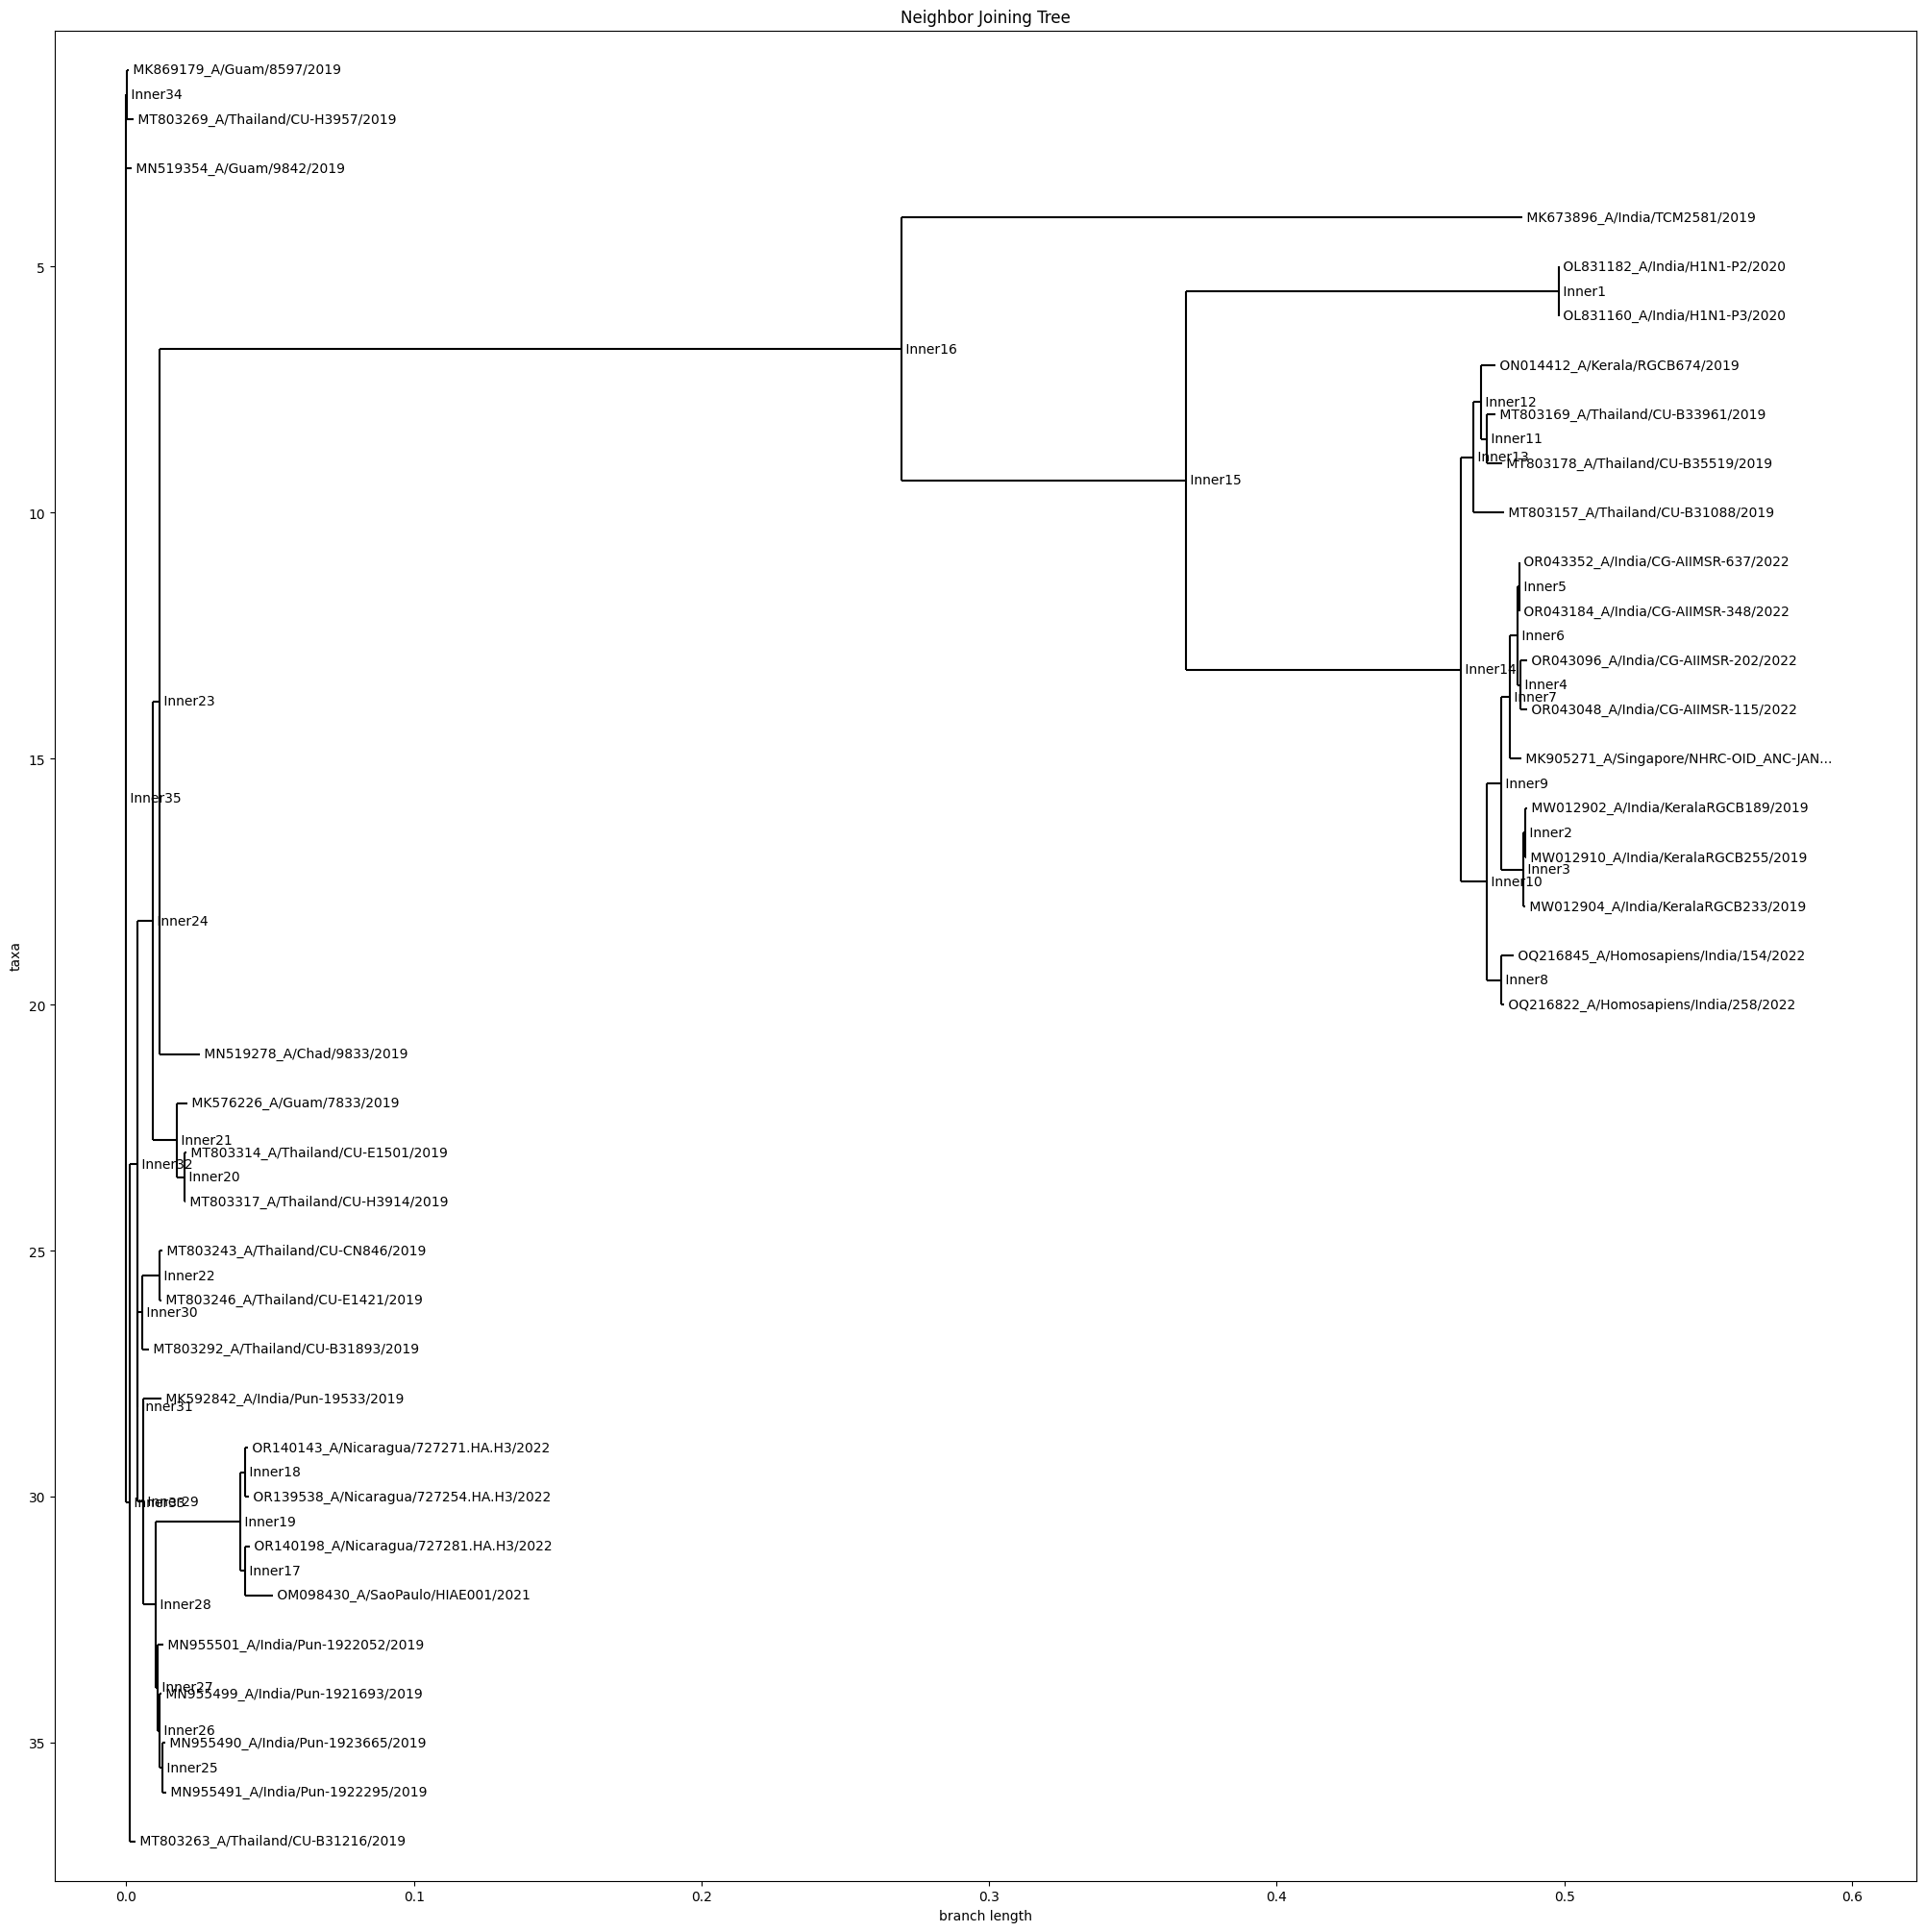

In [ ]:
import matplotlib.pyplot as plt

# Draw the phlyogenetic tree using terminal
fig, ax = plt.subplots(figsize=(25, 25))
plt.title("Neighbor Joining Tree")
Phylo.draw(NJTree, axes=ax)

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns

In [ ]:
df_distmatrix = pd.DataFrame(list(distMatrix), columns=distMatrix.names, index=distMatrix.names)

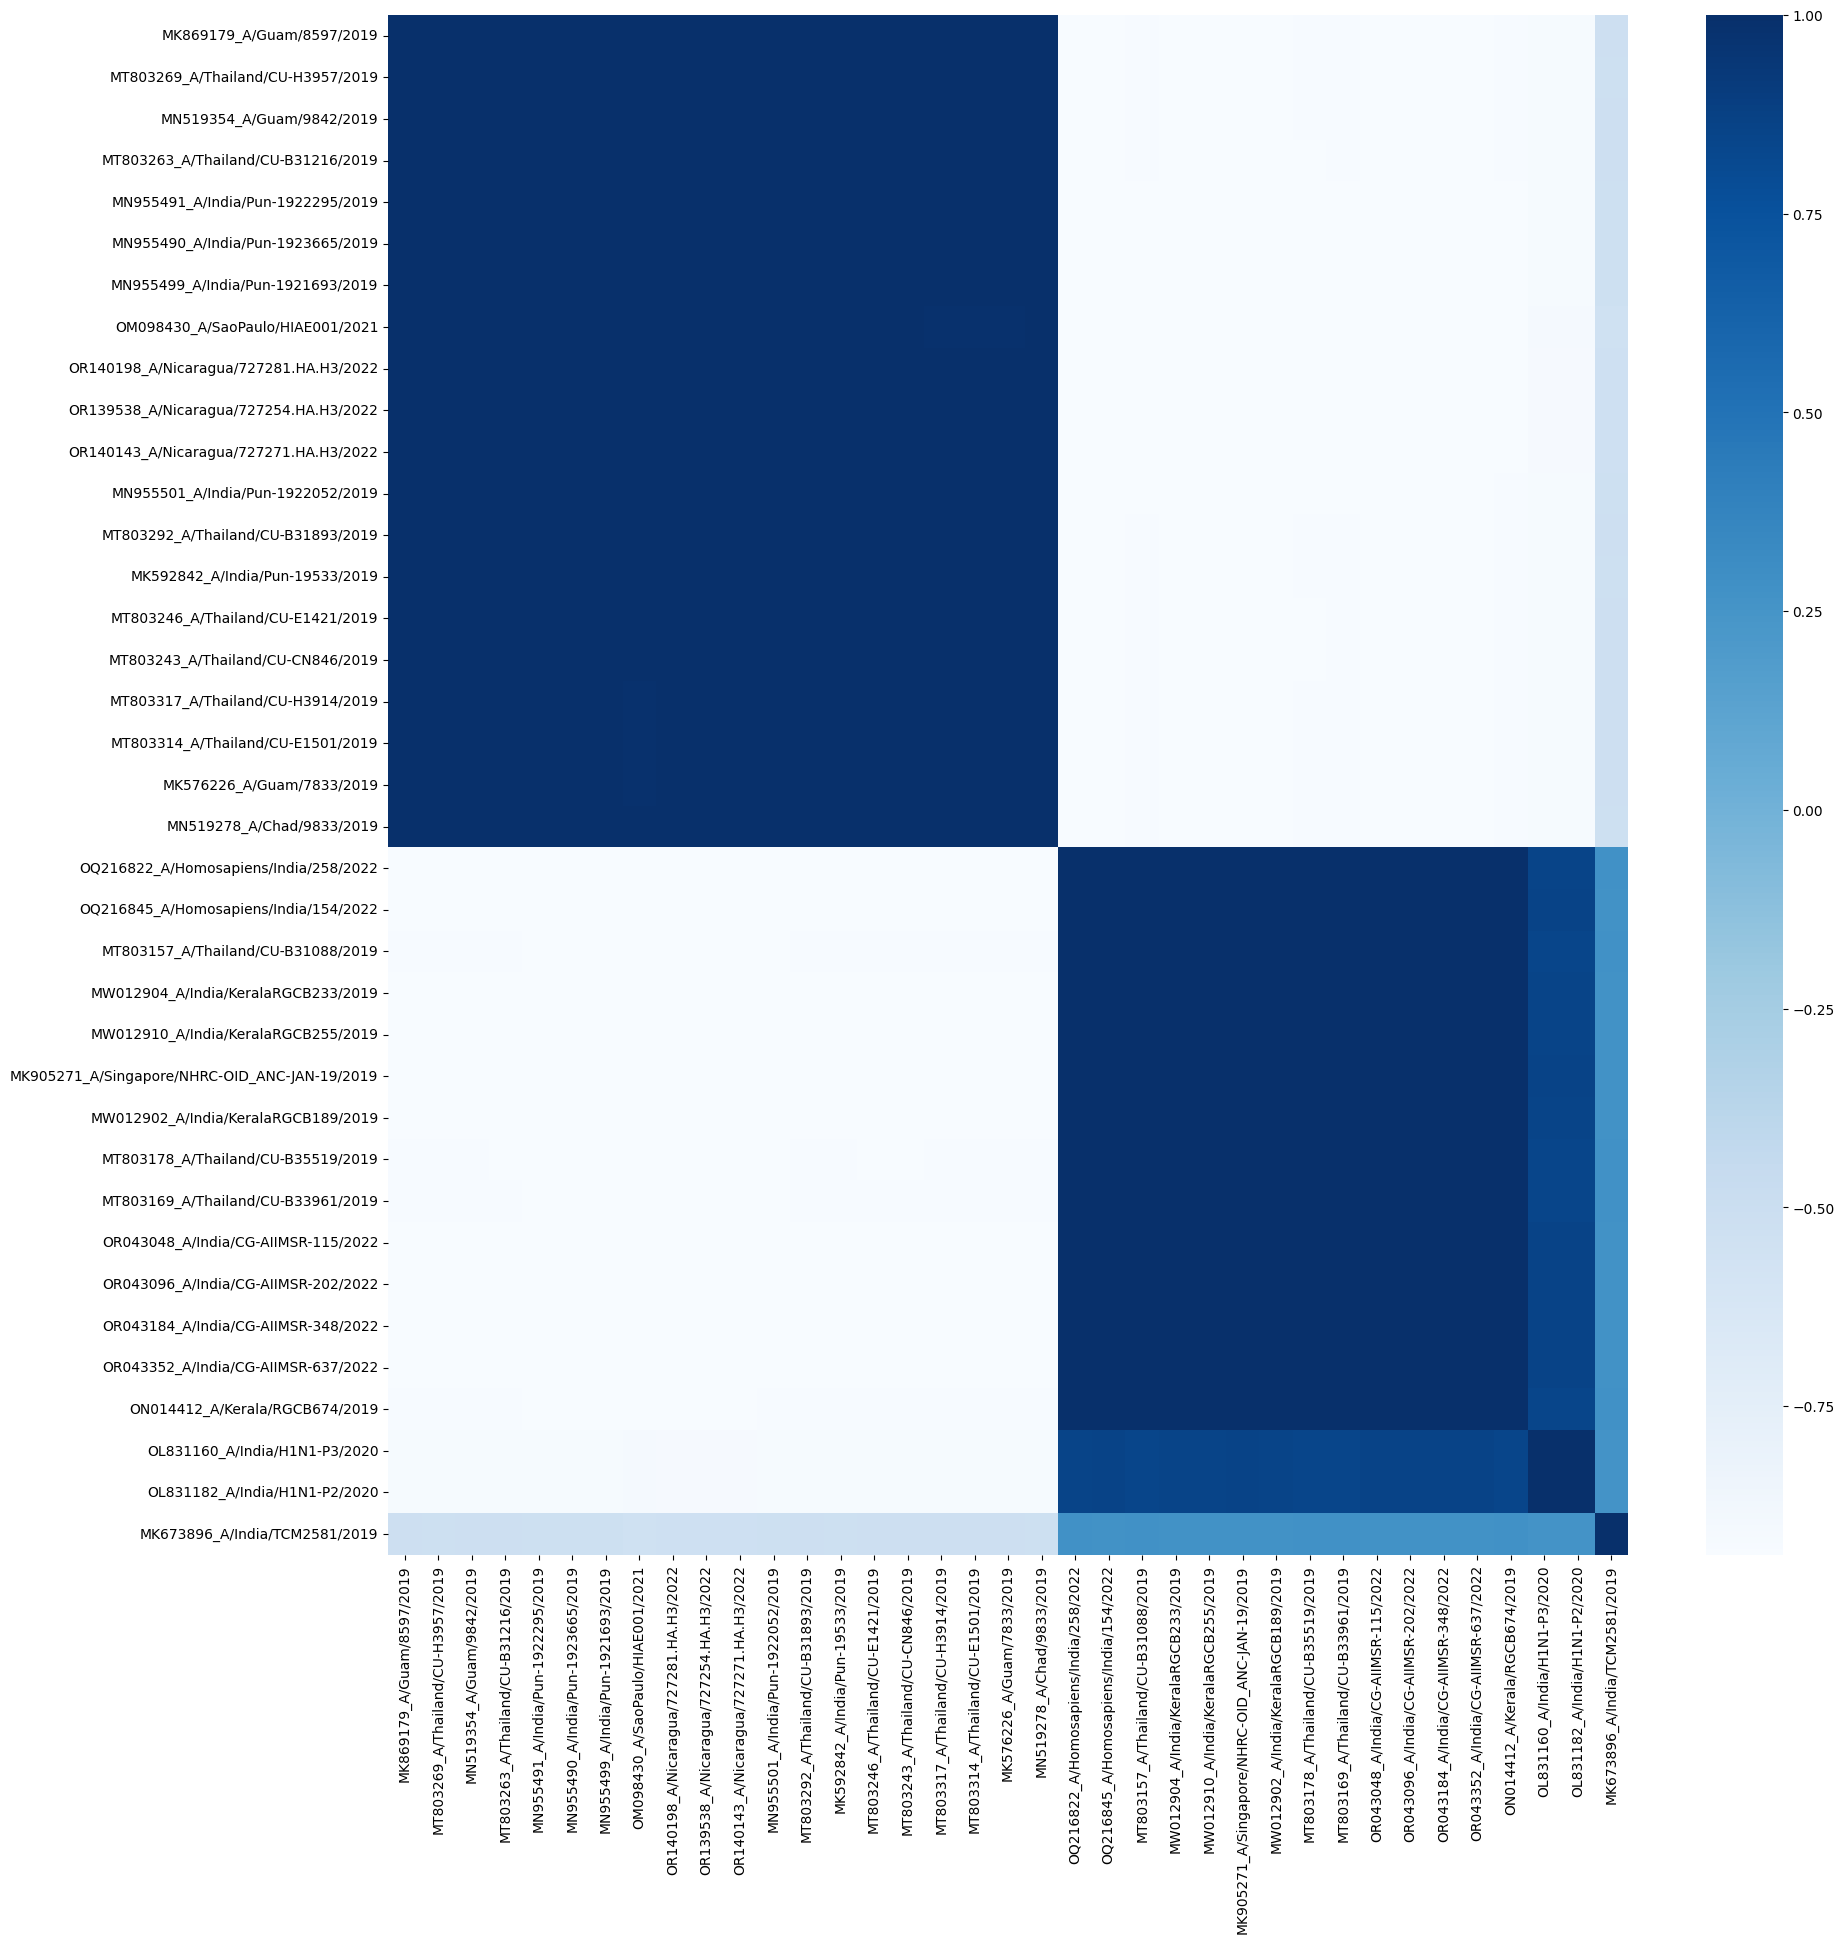

In [ ]:
plt.rcParams['figure.figsize'] = (20, 20)
heatmap = sns .heatmap(
    df_distmatrix.corr(),
    # annot=True,
    cmap="Blues",
    fmt='.1g'
)
plt.rcdefaults()
plt.show()

Ref
- https://medium.com/@insidedna/biopython-to-retrieving-fasta-sequences-from-ncbi-databases-20e35772a25
- https://www.biostars.org/p/63506/#63510
- http://biopython.org/DIST/docs/tutorial/Tutorial.html
- http://scikit-bio.org/docs/0.2.1/index.html
- https://medium.com/geekculture/phylogenetic-trees-implement-in-python-3f9df96c0c32